In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 26_01_2022 07_33_07.xlsx')

In [5]:
filtrado = dados[['Tem Comorbidade','Doenca Cardiovascular','Doenca Neurologica','Imunodeficiencia','Asma','Sindrome de Down','Faixa Etaria','Classificacao final','Houve internacao','Evolucao']]
filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})
filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
filtrado['Doenca Neurologica'] = filtrado['Doenca Neurologica'].map({1.0:'Doença neurológica'})
filtrado['Imunodeficiencia'] = filtrado['Imunodeficiencia'].map({1.0:'Imunodeficiência'})
filtrado['Asma'] = filtrado['Asma'].map({1.0:'Asma'})
filtrado['Sindrome de Down'] = filtrado['Sindrome de Down'].map({1.0:'Síndrome de Down'})
filtrado

C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_2652/3555088655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_2652/3555088655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
C:\Users\RYAN-R~1\A

,Tem Comorbidade,Doenca Cardiovascular,Doenca Neurologica,Imunodeficiencia,Asma,Sindrome de Down,Faixa Etaria,Classificacao final,Houve internacao,Evolucao
0,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Não,Óbito
1,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
2,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
3,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Não,Óbito
4,Não,NaN,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
...,...,...,...,...,...,...,...,...,...,...
164941,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
164942,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
164943,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,20-59 anos,COVID-19,Sim,Cura
164944,Sim,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,SRAG não especificado,Sim,Cura


In [6]:
anos9_obito = filtrado.loc[filtrado['Faixa Etaria']=='0-9 anos']
anos9_obito = anos9_obito.loc[anos9_obito['Evolucao']=='Óbito']
anos9_obito = anos9_obito.loc[anos9_obito['Classificacao final']=='COVID-19']

In [7]:
temComorbidade_obito = anos9_obito.loc[anos9_obito['Tem Comorbidade']=='Sim']
temComorbidade_obito = temComorbidade_obito.groupby('Tem Comorbidade').count()
temComorbidade_obito = temComorbidade_obito.drop(temComorbidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_obito = anos9_obito.groupby('Doenca Cardiovascular').count()
doencaCardio_obito = doencaCardio_obito.drop(doencaCardio_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_obito = anos9_obito.groupby('Doenca Neurologica').count()
doencaneuro_obito = doencaneuro_obito.drop(doencaneuro_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
imunodeficiencia_obito = anos9_obito.groupby('Imunodeficiencia').count()
imunodeficiencia_obito = imunodeficiencia_obito.drop(imunodeficiencia_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
asma_obito = anos9_obito.groupby('Asma').count()
asma_obito = asma_obito.drop(asma_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
down_obito = anos9_obito.groupby('Sindrome de Down').count()
down_obito = down_obito.drop(down_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
down_obito

,Evolucao
Sindrome de Down,
Síndrome de Down,5


In [8]:
totalObitos_anos9 = filtrado.loc[filtrado['Faixa Etaria']=='0-9 anos']
totalObitos_anos9 = totalObitos_anos9.loc[totalObitos_anos9['Evolucao']=='Óbito']
totalObitos_anos9 = totalObitos_anos9.loc[totalObitos_anos9['Classificacao final']=='COVID-19']
totalObitos_anos9 = totalObitos_anos9.groupby('Evolucao').count()
totalObitos_anos9 = totalObitos_anos9.drop(totalObitos_anos9.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalObitos_anos9 = totalObitos_anos9.reset_index()
totalObitos_anos9 = totalObitos_anos9['Houve internacao']
totalObitos_anos9

0    32
Name: Houve internacao, dtype: int64

In [9]:
juntaAnos9_obito = temComorbidade_obito.append(doencaCardio_obito)
juntaAnos9_obito = juntaAnos9_obito.append(doencaneuro_obito)
juntaAnos9_obito = juntaAnos9_obito.append(imunodeficiencia_obito)
juntaAnos9_obito = juntaAnos9_obito.append(asma_obito)
juntaAnos9_obito = juntaAnos9_obito.append(down_obito)
juntaAnos9_obito = juntaAnos9_obito.rename({'Sim':'Alguma comorbidade'})
juntaAnos9_obito = juntaAnos9_obito.reset_index()
juntaAnos9_obito

,index,Evolucao
0,Alguma comorbidade,23
1,Doença cardiovascular,8
2,Doença neurológica,8
3,Imunodeficiência,3
4,Asma,2
5,Síndrome de Down,5


In [10]:
ordenaAnos9_obito = juntaAnos9_obito.copy()
ordenaAnos9_obito.loc[0] = juntaAnos9_obito.loc[4]
ordenaAnos9_obito.loc[1] = juntaAnos9_obito.loc[3]
ordenaAnos9_obito.loc[2] = juntaAnos9_obito.loc[5]
ordenaAnos9_obito.loc[3] = juntaAnos9_obito.loc[1]
ordenaAnos9_obito.loc[4] = juntaAnos9_obito.loc[2]
ordenaAnos9_obito.loc[5] = juntaAnos9_obito.loc[0]
ordenaAnos9_obito

,index,Evolucao
0,Asma,2
1,Imunodeficiência,3
2,Síndrome de Down,5
3,Doença cardiovascular,8
4,Doença neurológica,8
5,Alguma comorbidade,23


In [11]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos9_obito),1):
    divisao.loc[i] = totalObitos_anos9.loc[0]
divisao = divisao.fillna(ordenaAnos9_obito)
divisao

,Valores
0,32
1,32
2,32
3,32
4,32
5,32


In [12]:
calcula_anos9_obito = ordenaAnos9_obito['Evolucao']/divisao['Valores']*100
calcula_anos9_obito = calcula_anos9_obito.to_frame()
calcula_anos9_obito = calcula_anos9_obito.rename(columns={0:'Evolucao'})
calcula_anos9_obito = calcula_anos9_obito['Evolucao']
calcula_anos9_obito

0      6.25
1     9.375
2    15.625
3      25.0
4      25.0
5    71.875
Name: Evolucao, dtype: object

In [13]:
anos9_hospi = filtrado.loc[filtrado['Faixa Etaria']=='0-9 anos']
anos9_hospi = anos9_hospi.loc[anos9_hospi['Houve internacao']=='Sim']
anos9_hospi = anos9_hospi.loc[anos9_hospi['Classificacao final']=='COVID-19']

In [14]:
temComorbidade_hospi = anos9_hospi.loc[anos9_hospi['Tem Comorbidade']=='Sim']
temComorbidade_hospi = temComorbidade_hospi.groupby('Tem Comorbidade').count()
temComorbidade_hospi = temComorbidade_hospi.drop(temComorbidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_hospi = anos9_hospi.groupby('Doenca Cardiovascular').count()
doencaCardio_hospi = doencaCardio_hospi.drop(doencaCardio_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_hospi = anos9_hospi.groupby('Doenca Neurologica').count()
doencaneuro_hospi = doencaneuro_hospi.drop(doencaneuro_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
imunodeficiencia_hospi = anos9_hospi.groupby('Imunodeficiencia').count()
imunodeficiencia_hospi = imunodeficiencia_hospi.drop(imunodeficiencia_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
asma_hospi = anos9_hospi.groupby('Asma').count()
asma_hospi = asma_hospi.drop(asma_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
down_hospi = anos9_hospi.groupby('Sindrome de Down').count()
down_hospi = down_hospi.drop(down_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
down_hospi

,Evolucao
Sindrome de Down,
Síndrome de Down,21


In [15]:
totalHospi_anos9 = filtrado.loc[filtrado['Faixa Etaria']=='0-9 anos']
totalHospi_anos9 = totalHospi_anos9.loc[totalHospi_anos9['Houve internacao']=='Sim']
totalHospi_anos9 = totalHospi_anos9.loc[totalHospi_anos9['Classificacao final']=='COVID-19']
totalHospi_anos9 = totalHospi_anos9.groupby('Houve internacao').count()
totalHospi_anos9 = totalHospi_anos9.drop(totalHospi_anos9.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalHospi_anos9 = totalHospi_anos9.reset_index()
totalHospi_anos9 = totalHospi_anos9['Evolucao']
totalHospi_anos9

0    918
Name: Evolucao, dtype: int64

In [16]:
juntaAnos9_hospi = temComorbidade_hospi.append(doencaCardio_hospi)
juntaAnos9_hospi = juntaAnos9_hospi.append(doencaneuro_hospi)
juntaAnos9_hospi = juntaAnos9_hospi.append(imunodeficiencia_hospi)
juntaAnos9_hospi = juntaAnos9_hospi.append(asma_hospi)
juntaAnos9_hospi = juntaAnos9_hospi.append(down_hospi)
juntaAnos9_hospi = juntaAnos9_hospi.rename({'Sim':'Alguma comorbidade'})
juntaAnos9_hospi = juntaAnos9_hospi.reset_index()
juntaAnos9_hospi

,index,Evolucao
0,Alguma comorbidade,351
1,Doença cardiovascular,41
2,Doença neurológica,72
3,Imunodeficiência,22
4,Asma,115
5,Síndrome de Down,21


In [17]:
ordenaAnos9_hospi = juntaAnos9_hospi.copy()
ordenaAnos9_hospi.loc[0] = juntaAnos9_hospi.loc[4]
ordenaAnos9_hospi.loc[1] = juntaAnos9_hospi.loc[3]
ordenaAnos9_hospi.loc[2] = juntaAnos9_hospi.loc[5]
ordenaAnos9_hospi.loc[3] = juntaAnos9_hospi.loc[1]
ordenaAnos9_hospi.loc[4] = juntaAnos9_hospi.loc[2]
ordenaAnos9_hospi.loc[5] = juntaAnos9_hospi.loc[0]
ordenaAnos9_hospi

,index,Evolucao
0,Asma,115
1,Imunodeficiência,22
2,Síndrome de Down,21
3,Doença cardiovascular,41
4,Doença neurológica,72
5,Alguma comorbidade,351


In [18]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos9_hospi),1):
    divisao.loc[i] = totalHospi_anos9.loc[0]
divisao = divisao.fillna(ordenaAnos9_hospi)
divisao

,Valores
0,918
1,918
2,918
3,918
4,918
5,918


In [19]:
calcula_anos9_hospi = ordenaAnos9_hospi['Evolucao']/divisao['Valores']*100
calcula_anos9_hospi = calcula_anos9_hospi.to_frame()
calcula_anos9_hospi = calcula_anos9_hospi.rename(columns={0:'Evolucao'})
calcula_anos9_hospi = calcula_anos9_hospi['Evolucao']
calcula_anos9_hospi

0    12.527233
1     2.396514
2     2.287582
3     4.466231
4     7.843137
5    38.235294
Name: Evolucao, dtype: object

In [20]:
comorbidade = ordenaAnos9_hospi['index']
comorbidade

0                     Asma
1         Imunodeficiência
2         Síndrome de Down
3    Doença cardiovascular
4       Doença neurológica
5       Alguma comorbidade
Name: index, dtype: object

In [21]:
legenda = pd.DataFrame(columns=['Óbito','Hospitalização'])

In [22]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

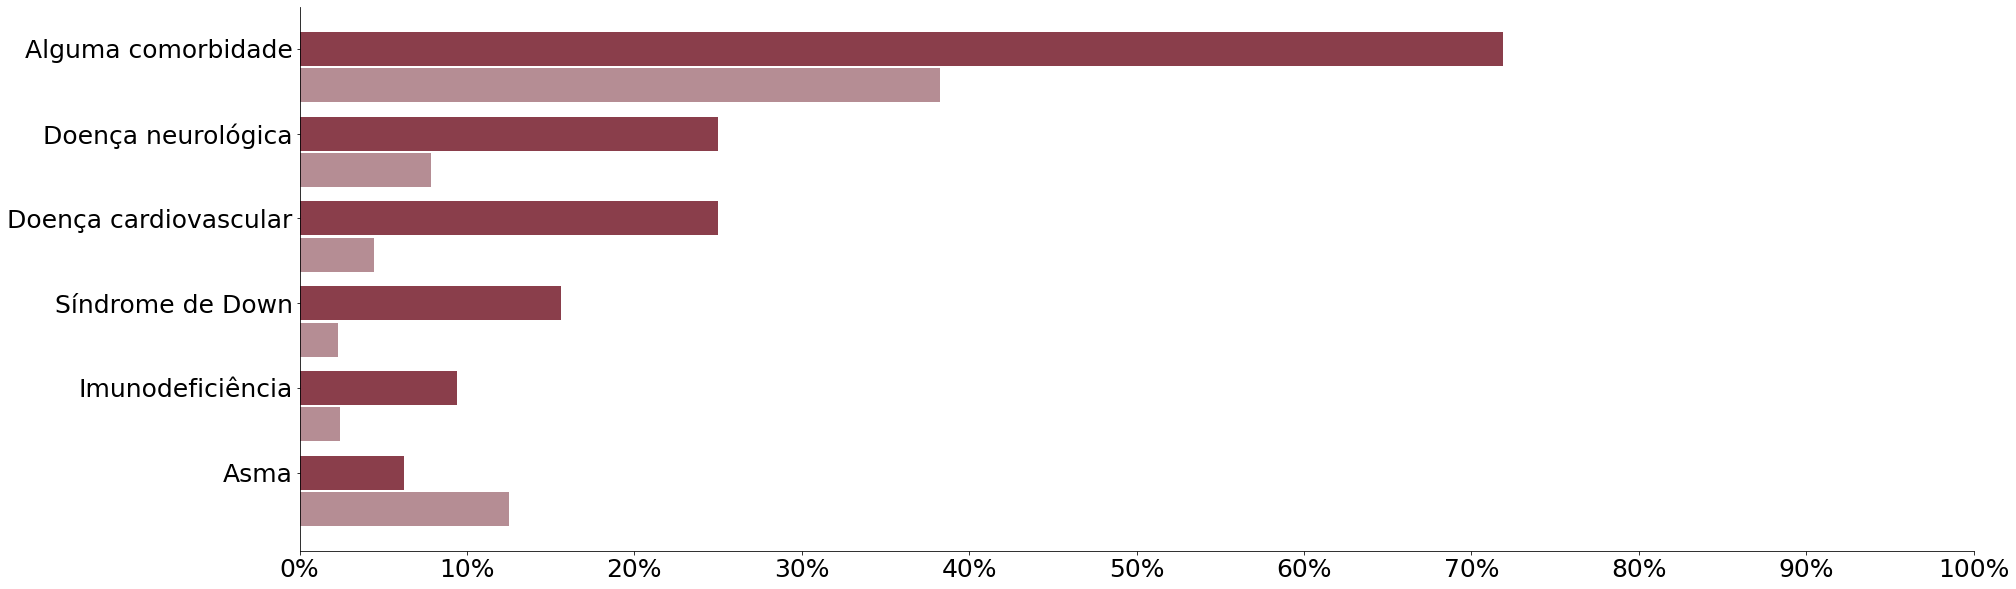

In [23]:
plt.figure(figsize=(30,10))
width=0.4
plt.barh(comorbidade,calcula_anos9_obito,width,color='#8a3e4b')
plt.barh(np.arange(0,np.size(comorbidade),1)-0.43,calcula_anos9_hospi,width,color='#b58d94')
sns.despine()
plt.xticks(np.arange(0,110,10),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide13_0-9 anos.png',dpi=720,bbox_inches='tight')